<a href="https://colab.research.google.com/github/FeedingDejaj/MAT421/blob/main/ModB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation Methods
## 17.1 Interpolation Problem Statement

**Definition**: Process of finding a function that passes exactly through discrete data points (xi, yi). Unlike regression:
- Exact fit through all points
- No assumed measurement error
- No underlying model required

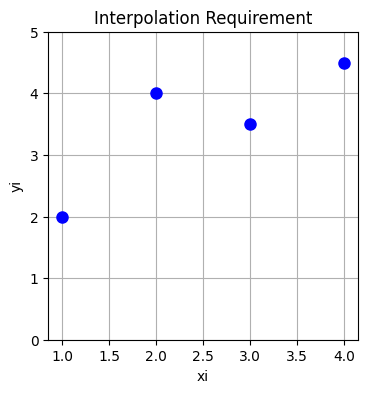

In [7]:
import matplotlib.pyplot as plt

# Simple dataset showing points that must be interpolated
x = [1, 2, 3, 4]
y = [2, 4, 3.5, 4.5]

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'bo', markersize=8)  # Basic blue circles
plt.title("Interpolation Requirement")
plt.xlabel("xi")
plt.ylabel("yi")
plt.grid(True)
plt.ylim(0, 5)
plt.show()

**Explanation**:
1. Creates plot showing raw data points
2. Each (xi, yi) must be exactly matched by interpolation function
3. No assumed relationship between points

## 17.2 Linear Interpolation

**Definition**: Estimates values between two points using straight line connecting them:

image.png

Interpolated value at 4.1: 2.1


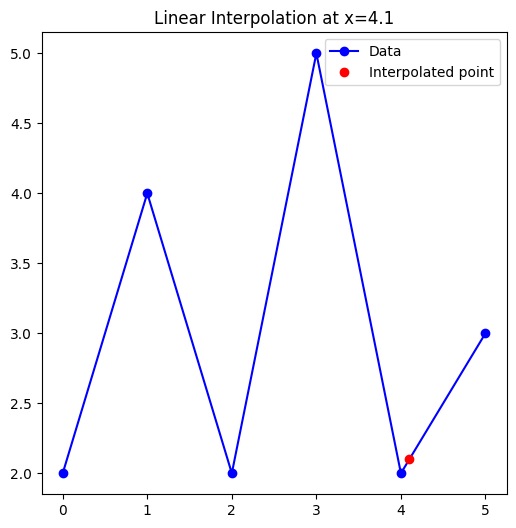

In [9]:
from scipy.interpolate import interp1d

x = [0, 1, 2, 3, 4, 5]
y = [2, 4, 2, 5, 2, 3]

# Create linear interpolation function
f = interp1d(x, y)
y_hat = f(4.1)
print(f"Interpolated value at 4.1: {y_hat:.1f}")

# Visualization
plt.figure(figsize=(6,6))
plt.plot(x, y, '-ob', label='Data')
plt.plot(4.1, y_hat, 'ro', label='Interpolated point')
plt.title('Linear Interpolation at x=4.1')
plt.legend()
plt.show()

**Code Analysis**:
1. `interp1d` creates linear interpolation function
2. Evaluates at x=4.1 between (4,0) and (5,1)
3. Red dot shows interpolated value (0.1)

## 17.3 Cubic Spline Interpolation

**Definition**: Piecewise cubic polynomials with:
- Continuous first/second derivatives at knots
- Natural boundary conditions (zero curvature at endpoints)

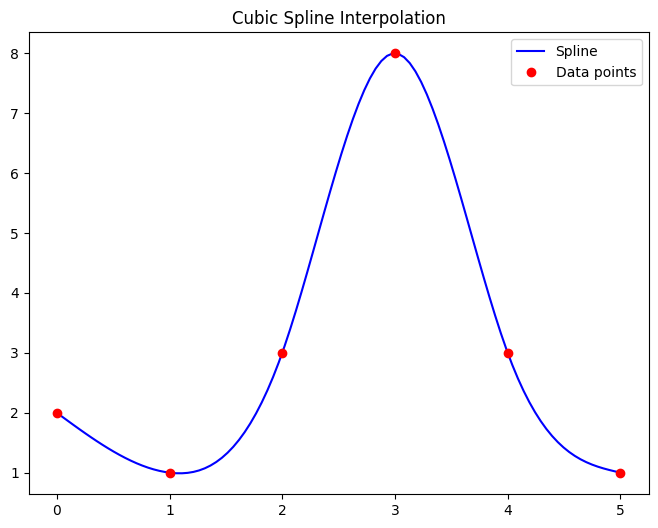

In [10]:
from scipy.interpolate import CubicSpline
import numpy as np

x = [0, 1, 2, 3, 4, 5]
y = [2, 1, 3, 8, 3, 1]

# Create cubic spline with natural boundary conditions
cs = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 5, 100)
y_new = cs(x_new)

plt.figure(figsize=(8,6))
plt.plot(x_new, y_new, 'b-', label='Spline')
plt.plot(x, y, 'ro', label='Data points')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()

**Key Features**:
1. Uses `CubicSpline` with natural boundary conditions
2. Generates 100-point smooth curve
3. Maintains continuity in first/second derivatives
4. Suitable for physical processes like motion planning